## Importing the liberaries : 

In [1]:

# it will help to upload data
import pandas as pd

# it will help ti perform numerical operations
import numpy as np

# it will help to visualize the data
import matplotlib.pyplot as plt
import seaborn as sns

# to see accuracy and confustion matrix 
from sklearn.metrics import accuracy_score, confusion_matrix


## Importing the data:

In [2]:

task = pd.read_csv("C:\\Users\\hemant\\Downloads\\Churn.csv")
task.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# to see shape of data :

task.shape

(7043, 21)

In [4]:
# to see column names : 

task.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
# to see data types of each variable

task.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

### Drop unwanted columns : 

In [6]:

# as we know here customer id does not required so we drop these columns

task.drop(['customerID'], axis = 1, inplace = True)


In [7]:
task.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Handle missing values :

In [61]:
# first we check is their any null value, if it is in the data then we perform handling steps

task.isnull().sum()


gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [62]:
# as we see in our data their is no null values.

# EDA

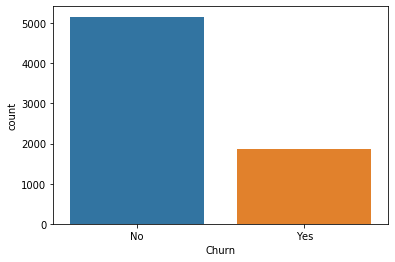

In [63]:

# first we see how many yes and no

# for this we use countplot it counts values and gives perfect result :

sns.countplot(x = 'Churn', data = task)


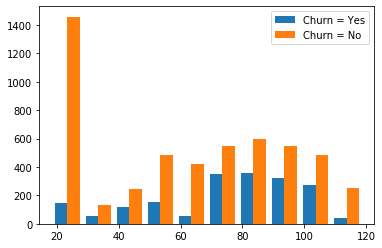

In [11]:

# now we see the relation between the monthly charges and the churn with the use of histogram : 

yes = task[task.Churn == 'Yes'].MonthlyCharges
no = task[task.Churn == 'No'].MonthlyCharges

plt.hist([yes, no], label = ['Churn = Yes', 'Churn = No'] )
plt.legend()
plt.show()


# as we see that more 1400 people are not likely to churn the company as they have monthlychargers less then 30

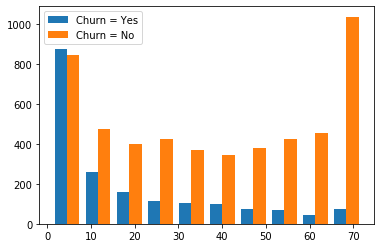

In [65]:

# between the tenure and churn : 

yes1 = task[task.Churn == 'Yes'].tenure
no1 = task[task.Churn == 'No'].tenure

plt.hist([yes1, no1], label = ['Churn = Yes', 'Churn = No'] )
plt.legend()
plt.show()


## Handle outliers : 

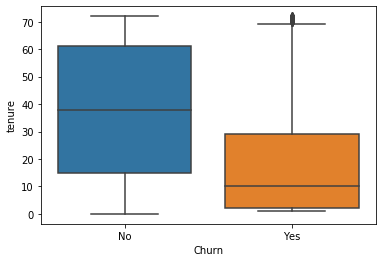

In [13]:

# as we know we have three numerical variables so we check outliers on them : 

sns.boxplot(x = 'Churn', y = 'tenure', data = task)

# their is not so much outlier so I did not perform further process

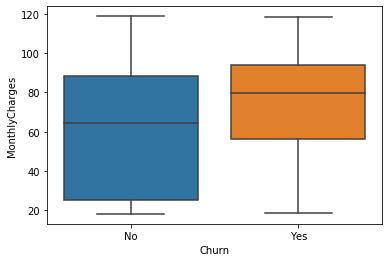

In [14]:
# for monthly charges

sns.boxplot(x = 'Churn', y = 'MonthlyCharges', data = task)

# their is not so much outlier so I did not perform further process

In [15]:

# the data type of TotalCharges variable should be float but it show object, so we convert it into float data type.

task['TotalCharges'].replace(to_replace = ' ', value= np.nan, inplace = True)
task['TotalCharges'] = task['TotalCharges'].astype(float)
task.dropna(axis=0, inplace=True)


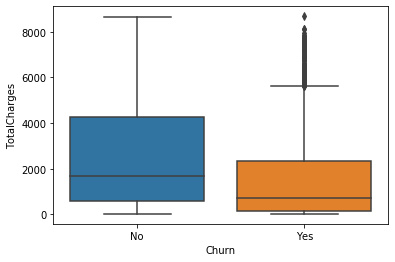

In [16]:
# for total charges

sns.boxplot(x = 'Churn', y = 'TotalCharges', data = task)


### Remove outliers : 

In [17]:

# to removing outliers I will use zscore method : 

from scipy import stats
zscore = np.abs(stats.zscore(task['TotalCharges']))

# where we remove those rows who value are more than 3rd standard deviation
outlier = np.where(zscore > 3)

finallist = outlier[0]

#now we remove
new_data = task.drop(index=finallist)


In [18]:
new_data.shape

(7032, 20)

## Performing Encoding : 


#### If our data in the categorical form then we need to convert it into numerical form, so we perform encoding technique for this I will use label encoding :



In [66]:
# import liberary that will help to do encoding : 

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()


In [20]:
# first we check that how many categorical variables in our dataset : 

new_data.dtypes

#almost all besides 3 -

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [21]:
# now we apply label encoding in all the columns at one steps, so for this we have to take all the categorical column 
# in a list : 

categ = new_data.select_dtypes(include = 'object').columns

cat_list = list(categ)


In [22]:
cat_list

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [68]:

# now using lambda we perform remaining steps :

new_data[cat_list] = new_data[cat_list].apply( lambda x:encoder.fit_transform(x) )


In [24]:
new_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [25]:
new_data.dtypes

gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object

In [26]:
task.shape

(7032, 20)

## Correlation :

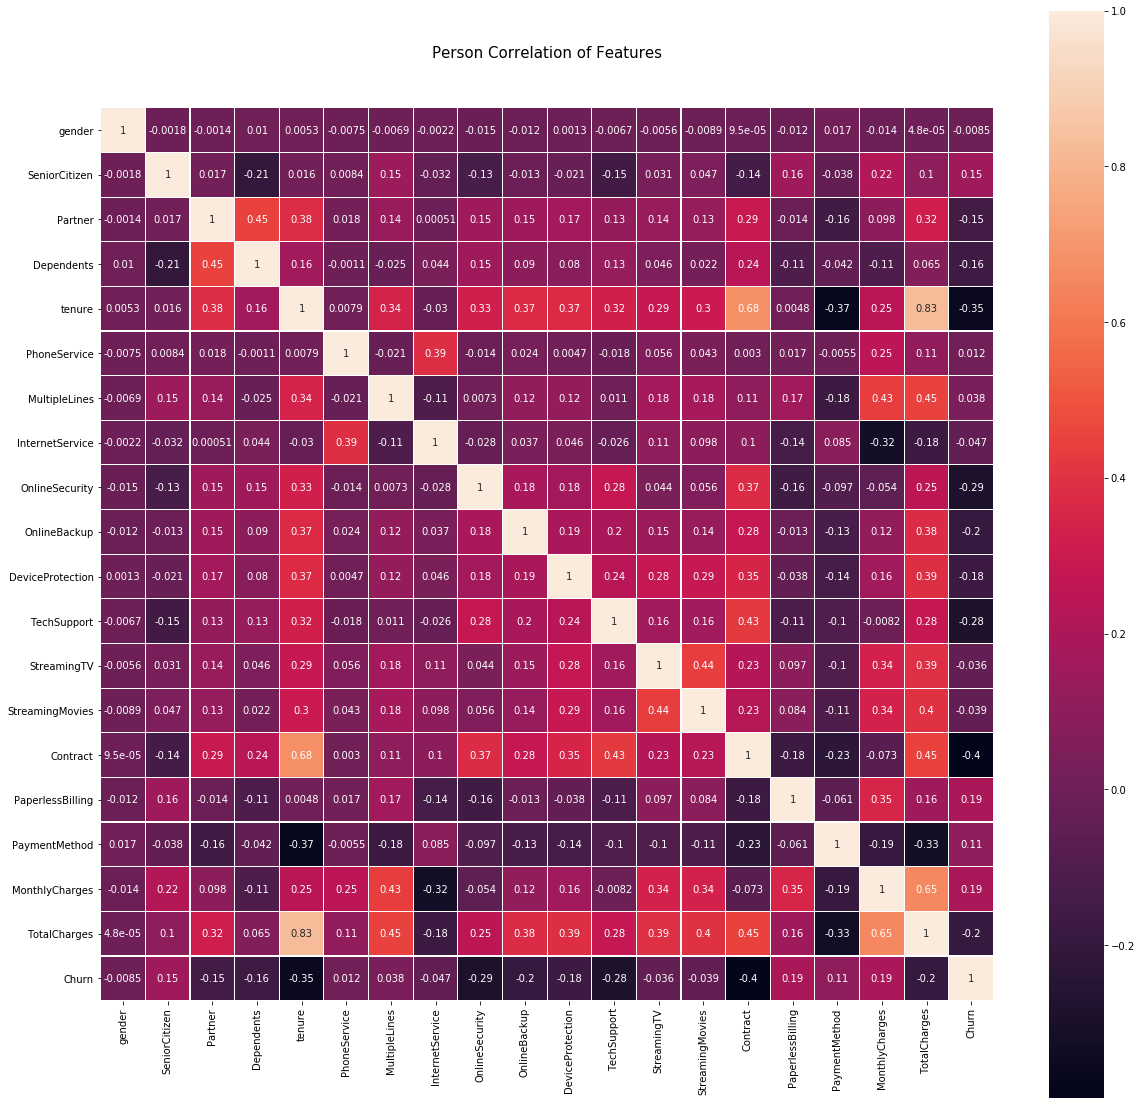

In [27]:
# to see correlation I will use heatmap :

plt.figure(figsize=(20,20))
plt.title('Person Correlation of Features', y=1.05, size=15)
sns.heatmap(new_data.corr(),linewidths=0.1,vmax=1.0, 
            square=True,  linecolor='white', annot=True)


## Spliting the data :

In [69]:

x = new_data.iloc[:,:-1]
y = new_data['Churn']


In [73]:
# split into train and test form : 

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)


## Transformation

In [30]:

# as we know in our data three variable has larger values than normal so we scalse down by using standard sclaer :

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


## Model building

### Logistice Regression :

In [31]:

# first we import liberaries then fit the data inside those algorithm

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, Y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:

# now we predict

y1_pred = classifier.predict(X_test)


In [71]:

# now we check accuracy

print(accuracy_score(Y_test,y1_pred))
print(confusion_matrix(Y_test, y1_pred))


0.7853589196872779
[[920 113]
 [189 185]]


#### as we see it gives 78% accuracy, so we use different algorithm

In [34]:
#new

### Decision Tree

In [35]:

# first we import liberaries then fit the data inside those algorithm

from sklearn.tree import DecisionTreeClassifier as dt
classifier = dt(criterion = 'gini')
classifier.fit(X_train, Y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [36]:

# now we predict

y2_pred = classifier.predict(X_test)


In [72]:

# now we check accuracy

print(accuracy_score(Y_test,y2_pred))
print(confusion_matrix(Y_test, y2_pred))


0.7299218194740583
[[830 203]
 [177 197]]


### Random Forest

In [38]:

# first we import liberaries then fit the data inside those algorithm

from sklearn.ensemble import RandomForestClassifier as RF
classifier = RF(n_estimators = 10, criterion = 'gini')
classifier.fit(X_train, Y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [39]:

# now we predict

y3_pred = classifier.predict(X_test)


In [74]:

# now we check accuracy

print(accuracy_score(Y_test,y3_pred))
print(confusion_matrix(Y_test, y3_pred))


0.7768301350390903
[[935  98]
 [216 158]]


### Hyperparameter tuning :

In [75]:

# now we train our model using hyperparameter tuning, which gives the best parameters for the algorithm :

from sklearn.model_selection import RandomizedSearchCV

# number of trees in Random Forest --
n_estimators = [int(x) for x in np.linspace(200,2000,10)]

# number of features to consider at every split - -
max_features = ['auto', 'sqrt', 'log2']

# maximum number of levels in tree  --
max_depth = [int(x)  for x in np.linspace(10,1000,10)]

# minimum number ofample required to split the node  --
min_samples_split = [1,2,3,5,6,4,7]

# minimum number of sample required at each leaf
min_samples_leaf = [2,4,3,5,6]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)


{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [1, 2, 3, 5, 6, 4, 7], 'min_samples_leaf': [2, 4, 3, 5, 6], 'criterion': ['entropy', 'gini']}


In [77]:

#
random = RF()

# here in randomsearchcv first we fit our algorithm in estimator
## then, those params which is randomly selected by model
### then all  -- 

random_cv = RandomizedSearchCV(estimator = random,
                              param_distributions = random_grid,
                              n_iter = 100,
                              cv = 3,
                              verbose = 2,
                              random_state = 100,
                              n_jobs = -1)

random_cv.fit(X_train, Y_train)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   49.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 13.5min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [78]:
## here we assign all the output values to best_params  and from these we find our accuracy and build model 

best_params = random_cv.best_estimator_
random_cv.best_params_


{'n_estimators': 800,
 'min_samples_split': 7,
 'min_samples_leaf': 3,
 'max_features': 'log2',
 'max_depth': 890,
 'criterion': 'gini'}

In [79]:

y4_pred = best_params.predict(X_test)


In [80]:

# now we check accuracy

print(accuracy_score(Y_test,y4_pred))
print(confusion_matrix(Y_test, y4_pred))


0.8009950248756219
[[946  87]
 [193 181]]


### after doing hyperparameter tuning we get  80% accuracy

In [176]:
#

## Important features :

In [ ]:
#  now we see importance of features with the help of Univariate Selection -

In [81]:

# In Univariate Selection, SelectKBest use chi2 which do statistical hypothesis testing among features and gives us those
# features which has best score among all, like in which I will be see top 10 features --

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

order = SelectKBest(score_func = chi2, k = 10)
order_rank = order.fit(x, y)


order_feat = pd.DataFrame(order_rank.scores_, columns = ['Score'])

dfcolumns = pd.DataFrame(x.columns)

features_rank = pd.concat([dfcolumns,order_feat], axis=1)

features_rank.columns = ['Features','Score']
features_rank


,Features,Score
0,gender,0.254297
1,SeniorCitizen,133.482766
2,Partner,81.857769
3,Dependents,131.271509
4,tenure,16377.328093
5,PhoneService,0.092948
6,MultipleLines,9.735960
7,InternetService,9.715269
8,OnlineSecurity,550.437364
9,OnlineBackup,229.441123


In [82]:

# top 10 -

top_10 = features_rank.nlargest(10, 'Score')
top_10

# here is our top 10 features :

,Features,Score
18,TotalCharges,629630.810349
4,tenure,16377.328093
17,MonthlyCharges,3653.074681
14,Contract,1111.759054
8,OnlineSecurity,550.437364
11,TechSupport,522.164716
9,OnlineBackup,229.441123
10,DeviceProtection,190.688004
1,SeniorCitizen,133.482766
3,Dependents,131.271509


### Now we train our model with selected features : 

In [83]:

X = x[['TotalCharges', 'tenure', 'MonthlyCharges', 'Contract', 'OnlineSecurity', 'TechSupport', 'OnlineBackup', 
      'DeviceProtection', 'SeniorCitizen', 'Dependents']]

Y = task['Churn']


In [84]:
# split into train and test form : 

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X, Y,test_size = 0.2, random_state = 42)


### Logistic Regression :

In [55]:

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [56]:
yn_pred = classifier.predict(x_test)

In [57]:

print(accuracy_score(y_test,yn_pred))
print(confusion_matrix(y_test, yn_pred))


0.7796730632551528
[[901 132]
 [178 196]]


### Random Forest :

In [85]:

# now I will use grid search cv for doing hyper parameter tuning  --


from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion' : [random_cv.best_params_['criterion']],
    'max_depth' : [random_cv.best_params_['max_depth']],
    'max_features' : [random_cv.best_params_['max_features']],
    'min_samples_leaf' : [random_cv.best_params_['min_samples_leaf'],
                        random_cv.best_params_['min_samples_leaf'] + 2,
                        random_cv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split' : [random_cv.best_params_['min_samples_split']-2,
                         random_cv.best_params_['min_samples_split']-1,
                         random_cv.best_params_['min_samples_split'],
                         random_cv.best_params_['min_samples_split']+1,
                         random_cv.best_params_['min_samples_split']+2],
    'n_estimators' : [random_cv.best_params_['n_estimators']-200,
                     random_cv.best_params_['n_estimators']-100,
                     random_cv.best_params_['n_estimators'],
                     random_cv.best_params_['n_estimators']+100,
                     random_cv.best_params_['n_estimators']+200]
} 

# print(param_grid)
random = RF()

grid_search = GridSearchCV(estimator = random,
                          param_grid = param_grid,
                          cv = 10,
                          n_jobs = -1,
                          verbose = 2)

grid_search.fit(x_train, y_train)

Fitting 10 folds for each of 75 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 16.9min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 28.7min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed: 33.4min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [86]:
# predict the model with best paramters and  features -

best_grid = grid_search.best_estimator_

y_pred = best_grid.predict(x_test)


In [87]:

print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))


[[940  93]
 [191 183]]
Accuracy Score 0.7981520966595593


In [ ]:
# --

### doing all the things I get almost 80% accuracy